# REST API Examples

Here are some examples that illustrate how to use the BPTK REST API (you need to start the demonstration server from a console by running the `run_server.sh` script in this directory. The server should then be running on port 5000.

There is a companion repository on [Github](https://github.com/transentis/sim-covid-dashboard) that contains the source code for a web-based dashboard that uses the COVID-Simulation via the REST API. The dashboard was built using React and [BPTK-Widgets](http://bptk.transentis.com). You can test the dashboard live on [www.covid-sim.com](http://www.covid-sim.com)

In [1]:
# find documentation for the requests library on https://docs.python-requests.org/
import requests
import json

Get a list of scenarios that the server knows about:

In [4]:
response = requests.get("http://localhost:5000/scenarios")

In [37]:
response

<Response [200]>

In [5]:
response.json()

['base',
 'dashboard',
 'avoid_the_peak',
 'strong_social_distancing',
 'weak_social_distancing']

Get the equations known to the dashboard scenario:

In [6]:
response = requests.post(
    url="http://localhost:5000/equations",
    json = {
    "scenarioManager": "smSir",
    "scenario":"dashboard"
}
)

In [32]:
response

<Response [200]>

In [7]:
response.json()

{'constants': ['duration',
  'infectivity',
  'lethality',
  'intensive_available',
  'intensive_percentage'],
 'converters': ['contact_number',
  'reproduction_rate',
  'total_population',
  'contact_rate',
  'intensive_needed'],
 'flows': ['infection_rate', 'recovery_rate', 'death_rate'],
 'points': ['contact_rate_table'],
 'stocks': ['deceased', 'susceptible', 'infectious', 'recovered']}

Get some data for a scenario and some equations:

In [8]:
response = requests.post(
    url="http://localhost:5000/run",
    json = {
    "scenario_managers": [
        "smSir"
    ],
    "scenarios": [
        "strong_social_distancing"
    ],
    "equations": [
        "recovered",
        "infectious"
    ]
}
)

In [9]:
import pandas as pd

In [11]:
df=pd.DataFrame.from_dict(response.json())

In [12]:
df

,recovered,infectious
1.0,0.000000e+00,120.000000
2.0,6.000000e+00,157.559934
3.0,1.387800e+01,201.203931
4.0,2.393819e+01,249.693920
5.0,3.642289e+01,300.880955
...,...,...
1496.0,7.841640e+07,977.451290
1497.0,7.841645e+07,927.673112
1498.0,7.841650e+07,880.429961
1499.0,7.841654e+07,835.592739


<AxesSubplot:>

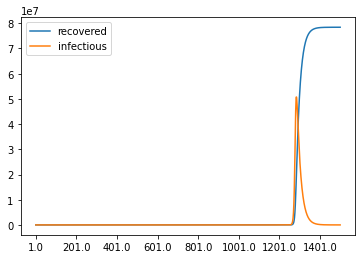

In [13]:
df.plot()